Importing the Libraries

In [807]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the collected dataset

In [808]:
data = pd.read_csv('C:/Users/USER/Desktop/Project/Model/modified_data_with_ethylene.csv')
data

,created_at,entry_id,Temperature,Humidity,Ethanol (Gas),Type of Fruit,Ethylene
0,2022-06-11T15:53:46+00:00,1,34.2,81.6,425.0,Banana,217.5
1,2022-06-11T15:54:39+00:00,2,34.3,83.8,425.0,Banana,217.5
2,2022-06-11T15:55:22+00:00,3,34.4,84.6,429.0,Banana,217.1
3,2022-06-11T15:55:55+00:00,4,34.4,85.7,438.0,Banana,216.2
4,2022-06-11T15:56:28+00:00,5,34.5,85.6,424.0,Banana,217.6
...,...,...,...,...,...,...,...
2240,2022-06-29T14:27:19+00:00,2241,34.9,96.4,290.0,Banana,195.0
2241,2022-06-29T14:27:53+00:00,2242,35.1,95.8,292.0,Banana,196.0
2242,2022-06-29T14:28:26+00:00,2243,35.2,95.3,299.0,Banana,199.5
2243,2022-06-29T14:29:00+00:00,2244,35.5,94.8,312.0,Banana,206.0


In [809]:
data["Ethanol (Gas)"].fillna(data['Ethanol (Gas)'].mean(), inplace=True) 
data["Ethylene"].fillna(data['Ethylene'].mean(), inplace=True)

data = pd.get_dummies(data, columns=['Type of Fruit'])

In [810]:
data.rename(columns= {'created_at': 'date'}, inplace=True)
data['date'] = data['date'].apply(lambda x: str(x)[:19])
data['date'] = pd.to_datetime(data['date'])

Classifying the Grades of the fruit

In [811]:
data["Grade"] = [0 for i in range (2245)]

# Grade 1: Unripe
data.loc[(data['Ethylene'] < 100) & (data['Ethanol (Gas)'] < 130), 'Grade'] = 1

# Grade 2: Ripe (perfect to eat)
data.loc[((data['Ethylene'] >= 100) & (data['Ethylene'] < 200)) & ((data['Ethanol (Gas)'] >= 130) & (data['Ethanol (Gas)'] < 210)), 'Grade'] = 2

# Grade 3: Over ripe
data.loc[((data['Ethylene'] >= 200) & (data['Ethylene'] < 300)) & ((data['Ethanol (Gas)'] >= 210) & (data['Ethanol (Gas)'] < 360)), 'Grade'] = 3

# Grade 4: Rotting stage
data.loc[(data['Ethylene'] >= 300) | (data['Ethanol (Gas)'] >= 360), 'Grade'] = 4

Getting the total hours elapsed till date

In [812]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2024, 4, 9, 14, 3, 21, 77449)

In [813]:
data['date'] = pd.to_datetime(data['date'])
data['Hours'] = (today - data['date'])/np.timedelta64(1,'h')

Sorting the hours

In [814]:
lst = list(data['Hours'])
lst.sort()
data.drop('Hours', axis=1, inplace=True)
ser = pd.Series(data = lst, index = data.index)
data['Hours'] = ser
data

,date,entry_id,Temperature,Humidity,Ethanol (Gas),Ethylene,Type of Fruit_Banana,Grade,Hours
0,2022-06-11 15:53:46,1,34.2,81.6,425.0,217.5,True,4,15599.563355
1,2022-06-11 15:54:39,2,34.3,83.8,425.0,217.5,True,4,15599.572522
2,2022-06-11 15:55:22,3,34.4,84.6,429.0,217.1,True,4,15599.581966
3,2022-06-11 15:55:55,4,34.4,85.7,438.0,216.2,True,4,15599.591133
4,2022-06-11 15:56:28,5,34.5,85.6,424.0,217.6,True,4,15599.600577
...,...,...,...,...,...,...,...,...,...
2240,2022-06-29 14:27:19,2241,34.9,96.4,290.0,195.0,True,0,16030.114744
2241,2022-06-29 14:27:53,2242,35.1,95.8,292.0,196.0,True,0,16030.123910
2242,2022-06-29 14:28:26,2243,35.2,95.3,299.0,199.5,True,0,16030.133077
2243,2022-06-29 14:29:00,2244,35.5,94.8,312.0,206.0,True,3,16030.145022


Splitting data to train, test

In [815]:
from sklearn.model_selection import train_test_split

X = data[['Temperature','Ethanol (Gas)', 'Ethylene', 'Humidity']]
y = data['Hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [816]:
from sklearn.metrics import r2_score

SVR

In [817]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

In [818]:
# score = svr.score(X_test, y_test)
# print("R-squared:", score)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_svr)))
r2_score(y_test, pred_svr)

RMSE: 161.14632915879045


0.014999199592844792

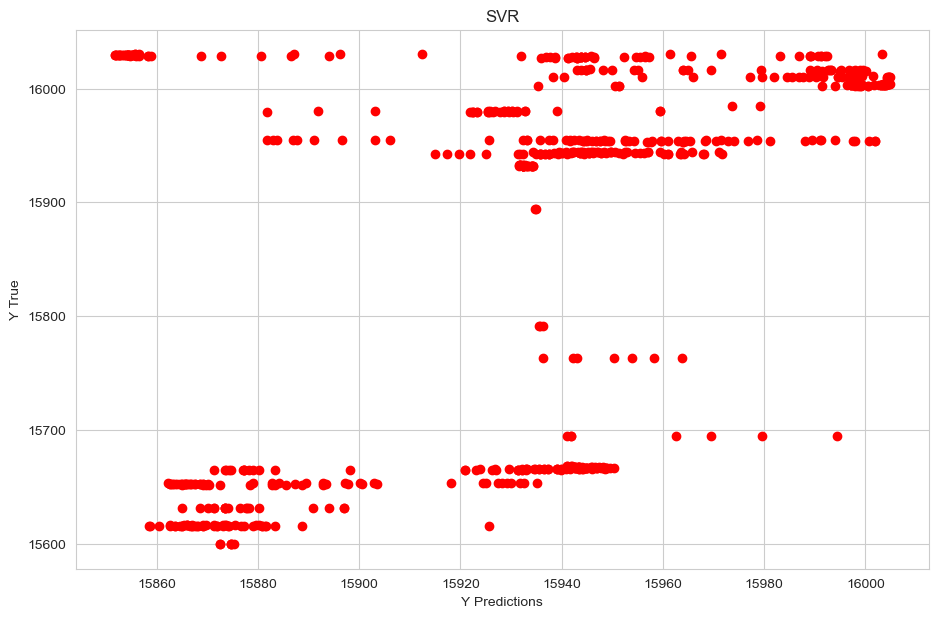

In [819]:
plt.figure(figsize=(11,7))
plt.title('SVR')
sns.set_style('whitegrid')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
plt.scatter(pred_svr, y_test, color='r')

Decision Tree

In [820]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

In [821]:
score = dtree.score(X_test, y_test)
print("R-squared: ", score)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_dtree)))
print("R2: ", r2_score(y_test,pred_dtree))

R-squared:  0.9542011221382589
RMSE: 34.74797847985661
R2:  0.9542011221382589


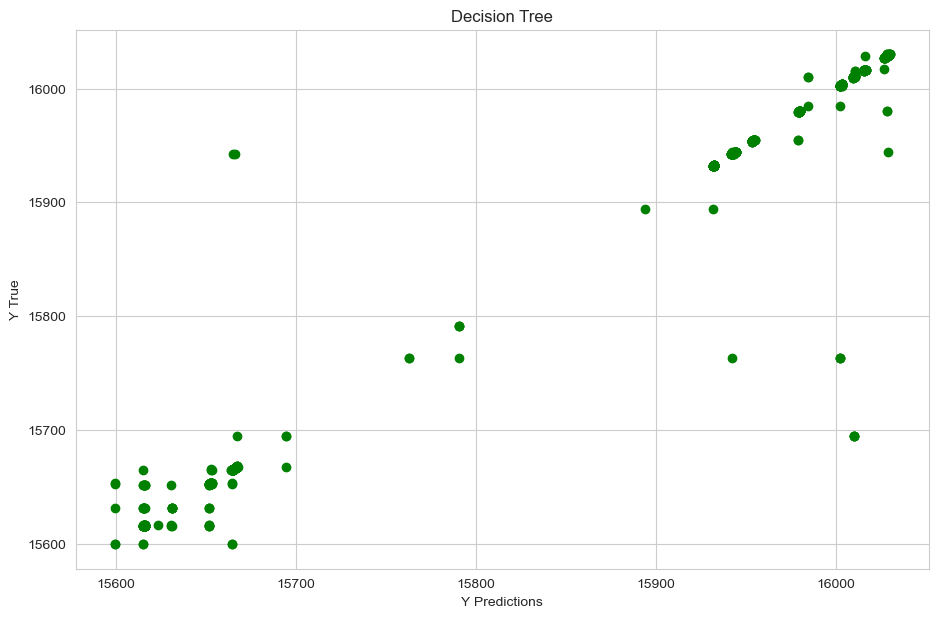

In [822]:
plt.figure(figsize=(11,7))
plt.title('Decision Tree')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
sns.set_style('whitegrid')
plt.scatter(pred_dtree, y_test, color='g')

Random Forest

In [823]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)

In [824]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
r2_score(y_test, pred_rfr)

RMSE: 30.451743924614828


0.9648261353831731

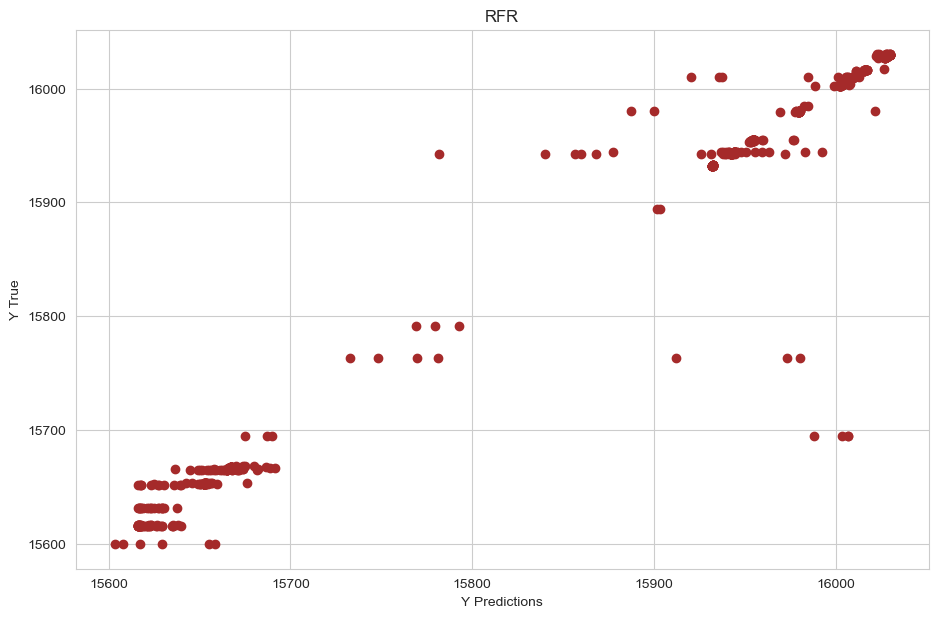

In [825]:
plt.figure(figsize=(11,7))
plt.title('RFR')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
sns.set_style('whitegrid')
plt.scatter(pred_rfr, y_test, color='brown')

Feature Importance

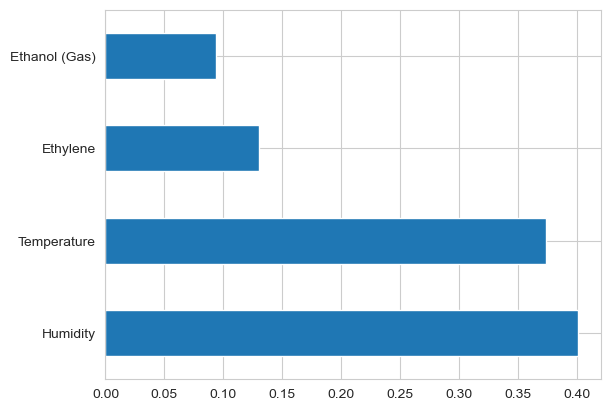

In [826]:
feature_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


In [827]:
import xgboost as xgb

xg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=4,
                       learning_rate=0.01,
                       min_child_weight=25,
                       gamma=0,
                       subsample=0.9,
                       colsample_bytree=0.9
                       )
xg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

pred_xg = xg.predict(X_test)

[0]	validation_0-rmse:15712.04587	validation_1-rmse:15704.77106


[100]	validation_0-rmse:5757.28546	validation_1-rmse:5750.00099
[200]	validation_0-rmse:2113.32617	validation_1-rmse:2107.25665
[300]	validation_0-rmse:777.76803	validation_1-rmse:773.85865
[400]	validation_0-rmse:287.83702	validation_1-rmse:285.20725
[500]	validation_0-rmse:109.56410	validation_1-rmse:109.01140
[600]	validation_0-rmse:47.28697	validation_1-rmse:49.91968
[700]	validation_0-rmse:29.17851	validation_1-rmse:35.04391
[800]	validation_0-rmse:24.60087	validation_1-rmse:31.84500
[900]	validation_0-rmse:22.95642	validation_1-rmse:30.59168
[999]	validation_0-rmse:21.82452	validation_1-rmse:29.70342


In [828]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_xg)))
r2_score(y_test, pred_xg)

RMSE: 29.703406558893686


0.9665336561643413

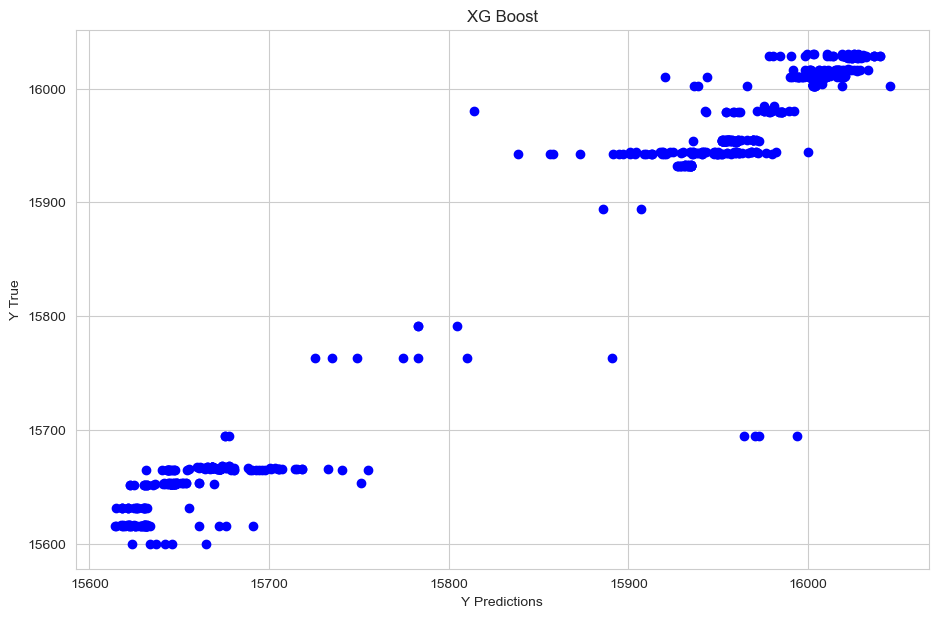

In [829]:
plt.figure(figsize=(11,7))
plt.title('XG Boost')
plt.xlabel('Y Predictions')
plt.ylabel('Y True')
sns.set_style('whitegrid')
plt.scatter(pred_xg, y_test, color='b')

In [830]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,  # Adjusted based on previous experimentation
    'learning_rate': 0.01,
    'min_child_weight': 25,  # Start with default, then try values > 1
    'gamma': 0,  # Start with 0, then experiment with larger values
    'subsample': 0.9,  # Typically between 0.5 and 1
    'colsample_bytree': 0.9,  # Typically between 0.5 and 1
}

cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=5,
                    num_boost_round=1500, early_stopping_rounds=50, 
                    metrics='rmse', as_pandas=True, seed=123)

print(cv_results)

      train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          161.690390        0.914963      161.720271       3.708800
1          160.246422        0.880832      160.294767       3.698649
2          158.858425        0.866198      158.920992       3.678476
3          157.520255        0.855846      157.595773       3.621760
4          156.180755        0.826565      156.268498       3.605634
...               ...             ...             ...            ...
1495        16.300016        0.200835       23.212621       1.508397
1496        16.298046        0.200461       23.211849       1.508982
1497        16.295694        0.200495       23.211210       1.508970
1498        16.293830        0.200573       23.209469       1.508486
1499        16.291616        0.200462       23.209096       1.507751

[1500 rows x 4 columns]
